In [1]:
import os
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Latex
from matplotlib import pyplot as plt

import econtools
from econtools.documents import Homework, RawLatex
from utils import SREQ, AdValoremSR, Laffer

filename = "econ-310-hw03"

doc = Homework(
    title = r"Econ 310 Week 3 Homework",
    due_date = r"Tuesday 9/17"
)


In [2]:
# Basic SREQ question

df = pd.read_csv("AdValoremSR_examples.csv")
mydf = df.loc[ (df['tp']>0) & (df['delta']==0) ]
params = dict(mydf.sample(1,random_state=2).reset_index(drop=True).loc[0])
prob = AdValoremSR(params)

setup = prob.no_tax.setup()
display(Latex(setup))

questions = fr"""
\begin{{enumerate}}[a.]
\item Write down the consumer's first order condition.
\item Write down the firm's first order condition.
\item Write down the market equilibrium condition.
\item Solve for the equilibrium price and total quantity.
\item Calculate total consumer utility and total firm profit in equilibrium.
\end{{enumerate}}
"""
print(questions)

latex = "\\begin{q}\n" + setup + questions + "\\end{q}\n"
doc.add(RawLatex(latex))
print("\nSolutions:")
print(prob.no_tax.sol)


<IPython.core.display.Latex object>


\begin{enumerate}[a.]
\item Write down the consumer's first order condition.
\item Write down the firm's first order condition.
\item Write down the market equilibrium condition.
\item Solve for the equilibrium price and total quantity.
\item Calculate total consumer utility and total firm profit in equilibrium.
\end{enumerate}


Solutions:
{'Q': 1080.0, 'p': 9.0, 'qd': 9.0, 'qs': 45.0, 'c': 19.0, 'revenue': 405.0, 'cost': 202.5, 'profit': 202.5, 'total_profit': 4860.0, 'utility': 140.5, 'total_utility': 16860.0, 'total_surplus': 21720.0}


In [3]:
# Tax question

setup = fr"""
Take the setup from problem 1. Suppose an ad valorem tax rate of \({prob.params['tp']*100:g}\%\) is placed on producers.
"""
display(Latex(setup))

questions = fr"""
\begin{{enumerate}}[a.]
\item Find the equilibrium price and total quantity traded under the tax.
\item Calculate the tax revenue raised by the tax.
\item Calculate the deadweight loss caused by the tax.
\end{{enumerate}}
"""
print(questions)

print("Solutions")
print(prob.sol)

latex = "\\begin{q}\n" + setup + questions + "\\end{q}\n"
doc.add(RawLatex(latex))

<IPython.core.display.Latex object>


\begin{enumerate}[a.]
\item Find the equilibrium price and total quantity traded under the tax.
\item Calculate the tax revenue raised by the tax.
\item Calculate the deadweight loss caused by the tax.
\end{enumerate}

Solutions
{'Q': 960.0000000000001, 'p': 10.0, 'qd': 8.000000000000002, 'qs': 40.00000000000001, 'c': 19.999999999999986, 'revenue': 320.00000000000006, 'cost': 160.00000000000006, 'profit': 160.0, 'total_profit': 3840.0, 'utility': 132.0, 'total_utility': 15840.0, 'tax_revenue': 1920.0000000000002, 'total_surplus': 21600.0, 'DWL': 120.0}


In [4]:
# Lump sum question

setup = fr"""
Take the setup from problem 2. Suppose that instead of using an ad-valorem tax, a lump sum tax is levied on producers that 
generates the same tax revenue.
"""
display(Latex(setup))

questions = fr"""
\begin{{enumerate}}[a.]
\item What amount of tax must be charged to each producer in order to raise the same revenue from problem 2?
\item Find the equilibrium price, total quantity, and total surplus under the lump sum tax. (Hint: Based on the lump sum principle, you shouldn't have to solve any new equations.)
\end{{enumerate}}
"""
print(questions)


print("Solutions")
print(prob.lump_sum.sol)

latex = "\\begin{q}\n" + setup + questions + "\\end{q}\n"
doc.add(RawLatex(latex))


<IPython.core.display.Latex object>


\begin{enumerate}[a.]
\item What amount of tax must be charged to each producer in order to raise the same revenue from problem 2?
\item Find the equilibrium price, total quantity, and total surplus under the lump sum tax. (Hint: Based on the lump sum principle, you shouldn't have to solve any new equations.)
\end{enumerate}

Solutions
{'Q': 1080.0, 'p': 9.0, 'qd': 9.0, 'qs': 45.0, 'c': 3.0, 'revenue': 405.0, 'cost': 202.5, 'profit': 202.5, 'total_profit': 4860.0, 'utility': 124.5, 'total_utility': 14940.0, 'total_surplus': 21720.0, 'tax_revenue': 1920.0000000000002}


In [5]:
# Laffer curve

df = pd.read_csv("Laffer_examples.csv")
params = dict(df.sample(1,random_state=5).reset_index(drop=True).loc[0])
prob = Laffer(params)

setup = prob.setup()
display(Latex(setup))

questions = fr"""
\begin{{enumerate}}[a.]
\item Prove that the equilibrium price is equal to: 
$$ p = {prob.formula_p()} $$
\item Prove that the equilibrium quantity is equal to: 
$$ Q = {prob.formula_q()} $$
\item Use Excel or any other software to plot tax revenue as $t$ goes from 0\% to 100\%. How would you describe the shape of this curve? At approximately what tax rate is the tax revenue maximized? This pattern is known as the Laffer Curve.
\end{{enumerate}}
"""
print(questions)

latex = "\\begin{q}\n" + setup + questions + "\\end{q}\n"
doc.add(RawLatex(latex))


<IPython.core.display.Latex object>


\begin{enumerate}[a.]
\item Prove that the equilibrium price is equal to: 
$$ p = \frac{ 32 }{ 9 - t } $$
\item Prove that the equilibrium quantity is equal to: 
$$ Q = 1,600 \left( \frac{ 1-t }{ 9 - t } \right) $$
\item Use Excel or any other software to plot tax revenue as $t$ goes from 0\% to 100\%. How would you describe the shape of this curve? At approximately what tax rate is the tax revenue maximized? This pattern is known as the Laffer Curve.
\end{enumerate}



In [6]:
doc.print_pdf(filename, "tex")

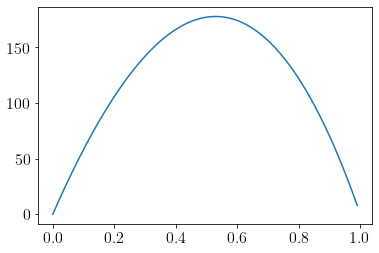

In [7]:
t, R = prob.get_plot_xy()
plt.plot(t, R)